# Introduction

This goal of this project is to analyze biodiversity data from the National Parks Service, particularly around various species observed in different national park locations. Biodiversity plays a vital role in maintaining the ecological balance and health of our planet. National Parks serve as critical sanctuaries for wildlife and plant species, helping to conserve biodiversity and protect endangered species.

This project focuses on analyzing data from the National Parks Service to gain insights into species observations and conservation efforts across four prominent national parks:
 - Yellowstone National Park
 - Yosemite National Park
 - Great Smoky Mountains National Park
 - Bryce National Park
 
### Key Objectives
 
The primary objectives of this project are:
1. To understand the distribution of species by their conservation status.
2. To identify which categories of species (e.g., Mammals, Birds, Plants) are more likely to be endangered.
3. To analyze species observations across parks and identify dominant or rare species.
4. To determine whether there is a significant relationship between species type and their conservation status.
5. To explore biodiversity trends across the parks and draw actionable conclusions for conservation strategies.
6. To identify parks with the highest and lowest total species observations and explore potential ecological challenges.
7. To determine which types of species (e.g., Mammals, Birds) are most frequently observed in each park.
8. To calculate the number of unique species in each park and understand biodiversity richness.
9. To analyze which parks have the highest number of endangered species observations and identify conservation hotspots.
10. To investigate if there is a relationship between the number of observations and conservation statuses.
11. To identify species with the lowest observation counts and highlight them as rare species requiring monitoring.
12. To determine the most dominant species in each park based on observation counts.

### Data Description

The project uses two datasets:
 - `species_info.csv`: Contains information about species, including their scientific names, categories (e.g., Mammals, Birds), and conservation status.
 - `observations.csv`: Includes data on species observations recorded in the four national parks.
 
    By combining these datasets, this project provides a comprehensive view of the biodiversity and conservation landscape in the selected national parks. The analysis involves creating visualizations and performing statistical tests to answer specific research questions and support data-driven conclusions.


**Data sources:**

Both `Observations.csv` and `Species_info.csv` was provided by [Codecademy.com](https://www.codecademy.com).

Note: The data for this project is *inspired* by real data, but is mostly fictional.

# Import necessary libraries

In [8]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# Ensure inline visualization for Jupyter Notebook

In [12]:
%matplotlib inline

# Load the datasets

In [14]:
species_info = pd.read_csv('species_info.csv')
observations = pd.read_csv('observations.csv')

# Display the first few rows of the datasets

In [17]:
print("Species Info Dataset:")
print(species_info.head())
print("\nObservations Dataset:")
print(observations.head())

Species Info Dataset:
  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN  

Observations Dataset:
            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            

## What is the distribution of `conservation_status` for animals?

To better understand the conservation efforts and biodiversity, we first examine the distribution of `conservation_status`.
We replace missing values in `conservation_status` with 'No Intervention' to ensure consistency in our analysis.


### Fill NaN values in 'conservation_status' with 'No Intervention' for clarity

In [26]:
species_info['conservation_status'] = species_info['conservation_status'].fillna('No Intervention')

### Count the occurrences of each conservation status


In [29]:
conservation_counts = species_info['conservation_status'].value_counts()

### Plot the distribution

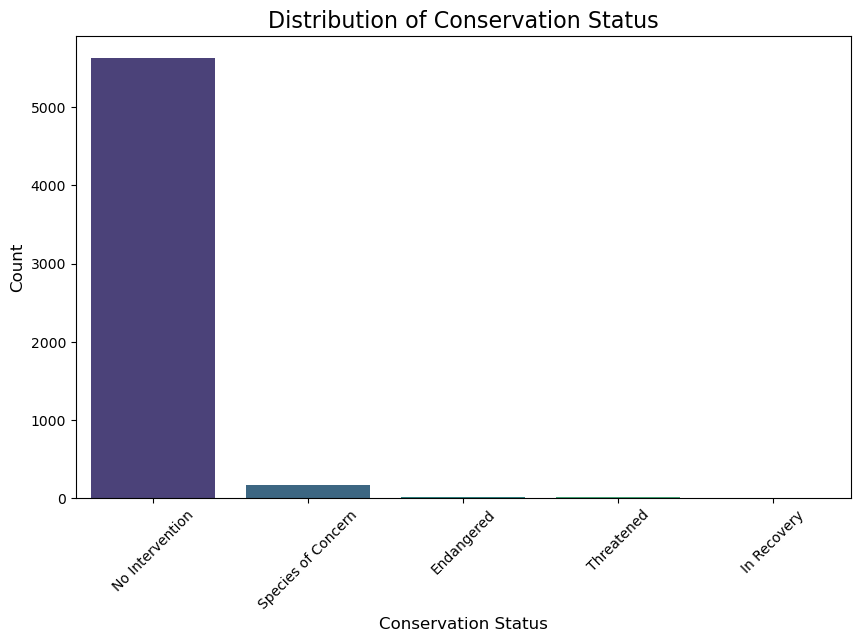

In [46]:
plt.figure(figsize=(10, 6))
sns.barplot(x=conservation_counts.index, y=conservation_counts.values, hue=conservation_counts.index, dodge=False, palette='viridis')
plt.title('Distribution of Conservation Status', fontsize=16)
plt.xlabel('Conservation Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()

## Are certain types of species more likely to be endangered?
 
Here, we focus on the relationship between species categories (e.g., Mammals, Birds) and their conservation status.
We specifically look at species that are not categorized as 'No Intervention'.

### Filter species with conservation status other than 'No Intervention'

In [52]:
endangered_species = species_info[species_info['conservation_status'] != 'No Intervention']

### Count endangered species by category

In [55]:
endangered_counts = endangered_species['category'].value_counts()

### Plot the distribution of endangered species by category

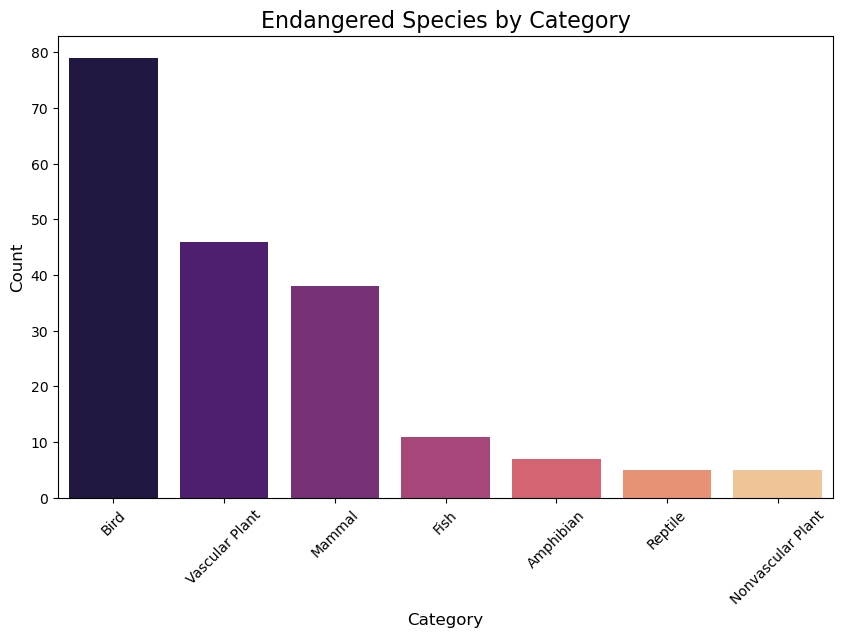

In [60]:
plt.figure(figsize=(10, 6))
sns.barplot(x=endangered_counts.index, y=endangered_counts.values, hue=endangered_counts.index, dodge=False, palette='magma', legend=False)
plt.title('Endangered Species by Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()

## Are the differences between species and their conservation status significant?

To assess whether the differences in conservation status among species categories are statistically significant,
I perform a Chi-Square test. This test evaluates whether there is an association between two categorical variables.

In [65]:
from scipy.stats import chi2_contingency

In [67]:
# Create a contingency table
contingency_table = pd.crosstab(species_info['category'], species_info['conservation_status'])

In [69]:
# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Test Results:")
print(f"Chi2 Statistic: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of Freedom: {dof}")

Chi-Square Test Results:
Chi2 Statistic: 628.581965798279
p-value: 2.4551423165990194e-117
Degrees of Freedom: 24


In [71]:
# Interpret the p-value
if p < 0.05:
    print("The differences between species and their conservation status are statistically significant.")
else:
    print("The differences between species and their conservation status are not statistically significant.")

The differences between species and their conservation status are statistically significant.


## Which species were spotted the most at each park?

By combining the `species_info` and `observations` datasets, we can determine the species with the highest observations in each park.
This helps identify which species are most commonly seen by visitors.

### Merge the datasets on 'scientific_name'

In [77]:
data_merged = pd.merge(observations, species_info, on='scientific_name')

### Find the species with the highest observations in each park

In [80]:
most_spotted = data_merged.groupby(['park_name', 'common_names'])['observations'].sum().reset_index()
most_spotted = most_spotted.sort_values(['park_name', 'observations'], ascending=[True, False])

### Display the top species spotted at each park

In [84]:
most_spotted_by_park = most_spotted.groupby('park_name').head(1)
print("\nMost Spotted Species by Park:")
print(most_spotted_by_park)


Most Spotted Species by Park:
                                 park_name        common_names  observations
1729                   Bryce National Park       Dicranum Moss           707
7233   Great Smoky Mountains National Park       Dicranum Moss           544
12737            Yellowstone National Park       Dicranum Moss          1779
17283               Yosemite National Park  Brachythecium Moss          1066


## Which parks have the highest and lowest number of species observations?

To understand biodiversity at the park level, we aggregate the total number of observations per park.

### Aggregate total observations by park

In [90]:
observations_by_park = observations.groupby('park_name')['observations'].sum().sort_values(ascending=False)

### Plot total observations by park

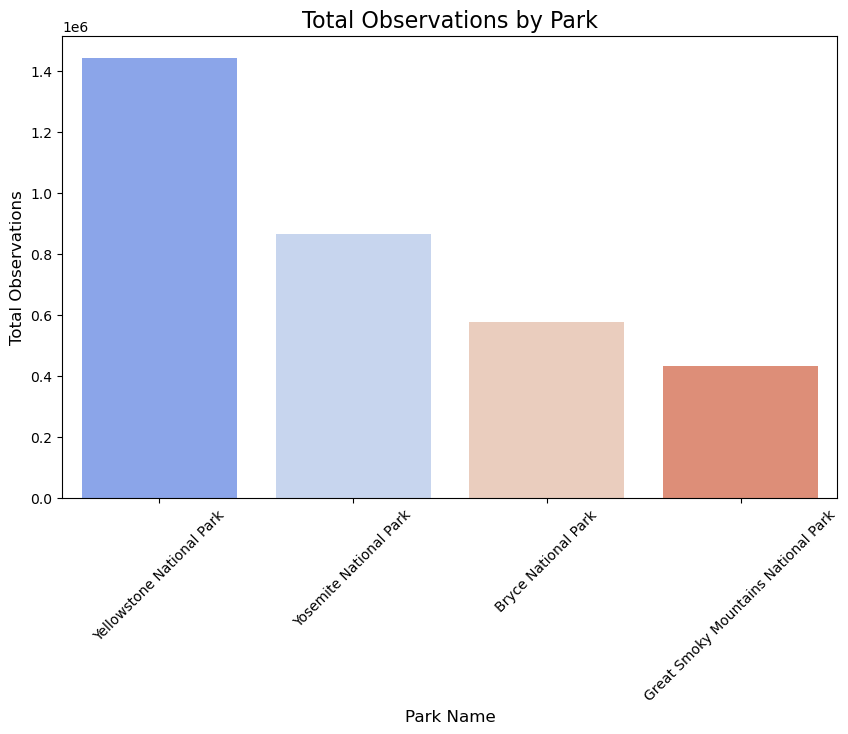

In [97]:
plt.figure(figsize=(10, 6))
sns.barplot(x=observations_by_park.index, y=observations_by_park.values, hue=observations_by_park.index, dodge=False, palette='coolwarm')
plt.title('Total Observations by Park', fontsize=16)
plt.xlabel('Park Name', fontsize=12)
plt.ylabel('Total Observations', fontsize=12)
plt.xticks(rotation=45)
plt.show()

## Which types of species are most commonly observed in each park?

We analyze the types of species (e.g., Mammals, Birds, etc.) that are most frequently observed in each park.


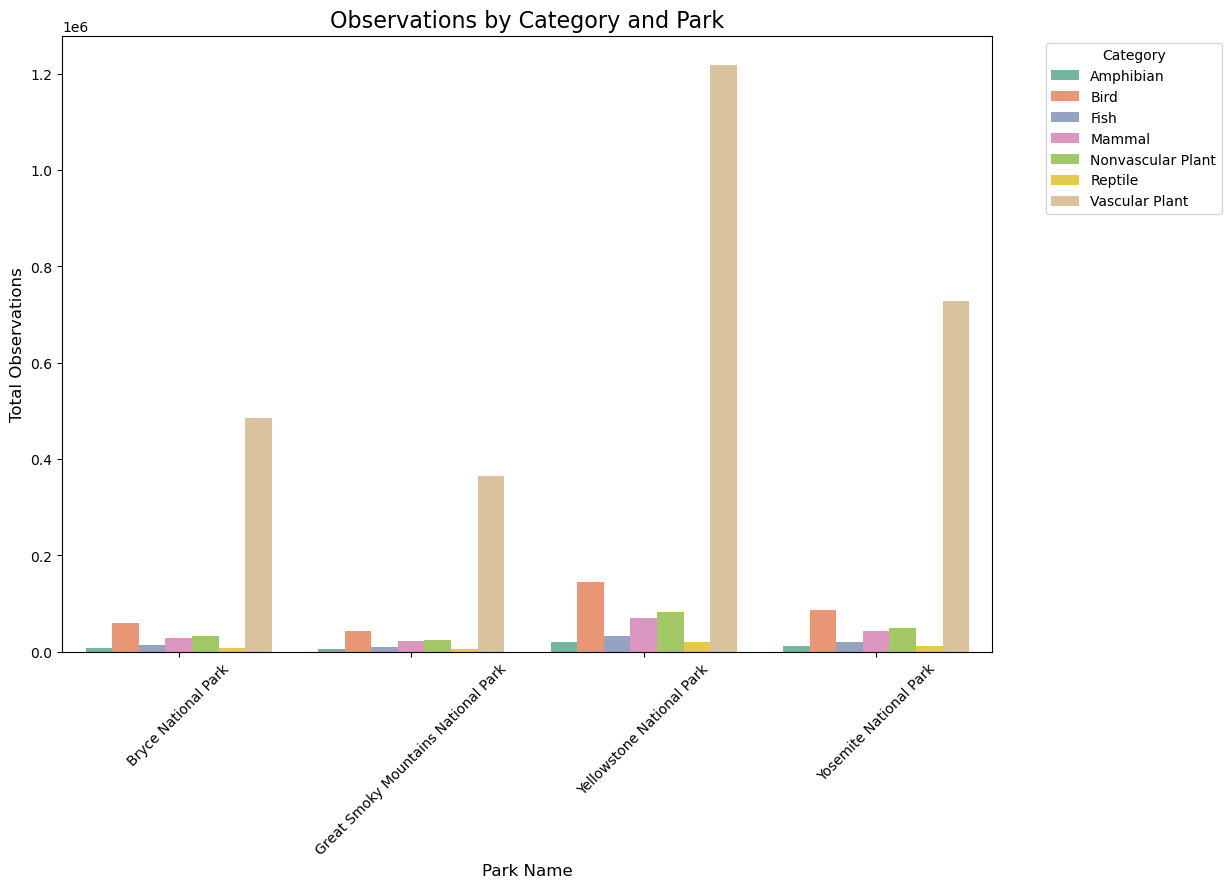

In [100]:
# Aggregate observations by park and category
observations_by_category_park = data_merged.groupby(['park_name', 'category'])['observations'].sum().reset_index()

# Plot observations by category for each park
plt.figure(figsize=(12, 8))
sns.barplot(data=observations_by_category_park, x='park_name', y='observations', hue='category', palette='Set2')
plt.title('Observations by Category and Park', fontsize=16)
plt.xlabel('Park Name', fontsize=12)
plt.ylabel('Total Observations', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## How many unique species are observed in each park?

Unique species observed in a park reflect the biodiversity richness of that location.

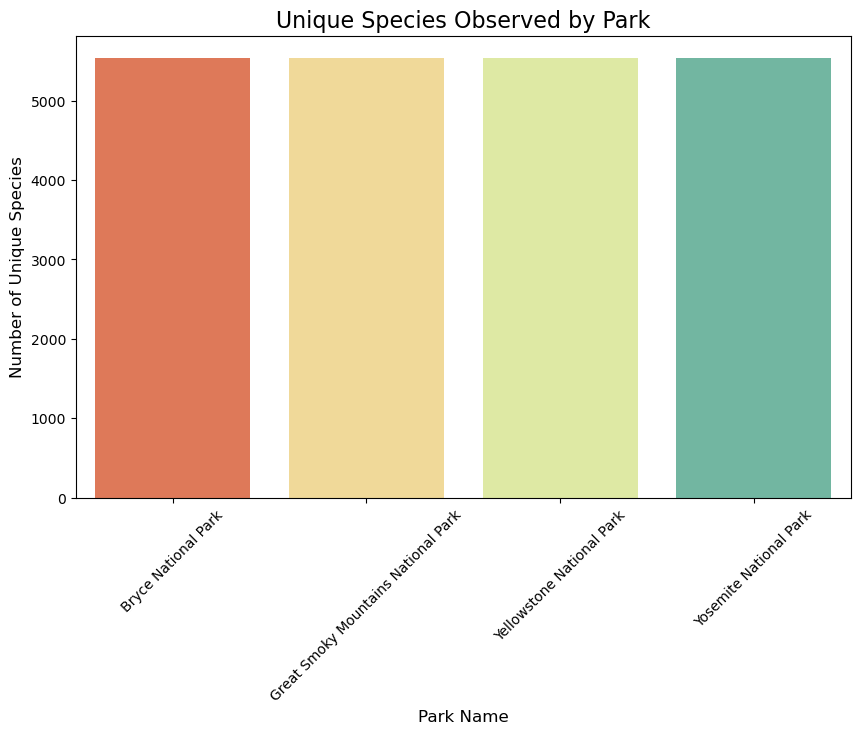

In [108]:
# Calculate unique species per park
unique_species_by_park = data_merged.groupby('park_name')['scientific_name'].nunique().sort_values(ascending=False)

# Plot unique species by park
plt.figure(figsize=(10, 6))
sns.barplot(x=unique_species_by_park.index, y=unique_species_by_park.values, hue=unique_species_by_park.index, dodge=False, palette='Spectral')
plt.title('Unique Species Observed by Park', fontsize=16)
plt.xlabel('Park Name', fontsize=12)
plt.ylabel('Number of Unique Species', fontsize=12)
plt.xticks(rotation=45)
plt.show()

## Which parks have the highest number of observations of endangered species?

This analysis focuses on identifying the parks with the highest observations of species that are endangered.

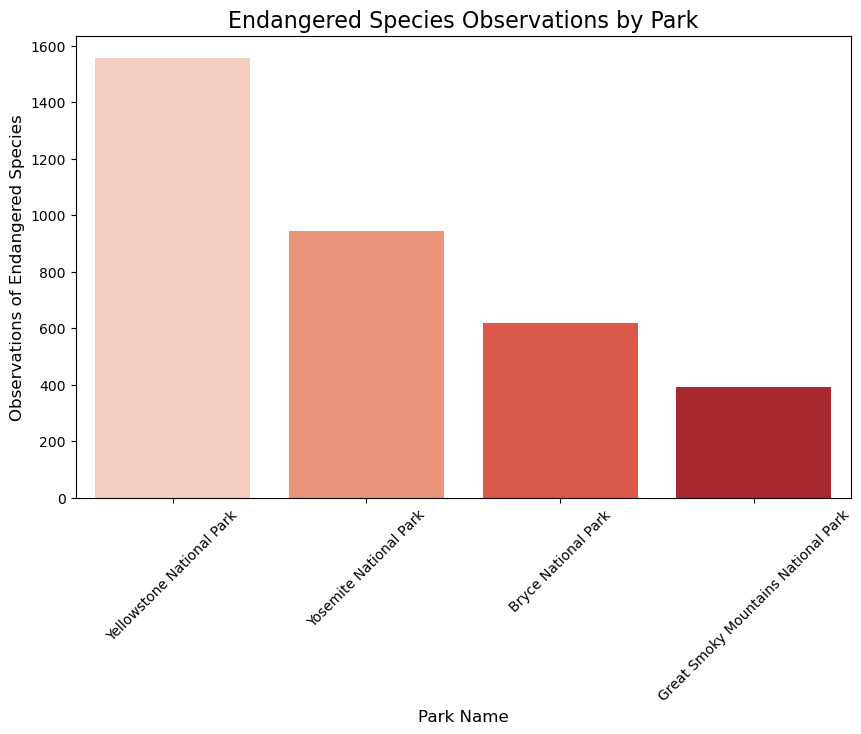

In [114]:
# Filter data for endangered species
endangered_observations = data_merged[data_merged['conservation_status'] == 'Endangered']

# Aggregate observations by park
endangered_by_park = endangered_observations.groupby('park_name')['observations'].sum().sort_values(ascending=False)

# Plot endangered species observations by park
plt.figure(figsize=(10, 6))
sns.barplot(x=endangered_by_park.index, y=endangered_by_park.values, hue=endangered_by_park.index, dodge=False, palette='Reds')
plt.title('Endangered Species Observations by Park', fontsize=16)
plt.xlabel('Park Name', fontsize=12)
plt.ylabel('Observations of Endangered Species', fontsize=12)
plt.xticks(rotation=45)
plt.show()

## Is there a correlation between the number of observations and the conservation status of species?

Here, we analyze if there is a relationship between a species' conservation status and the number of observations.

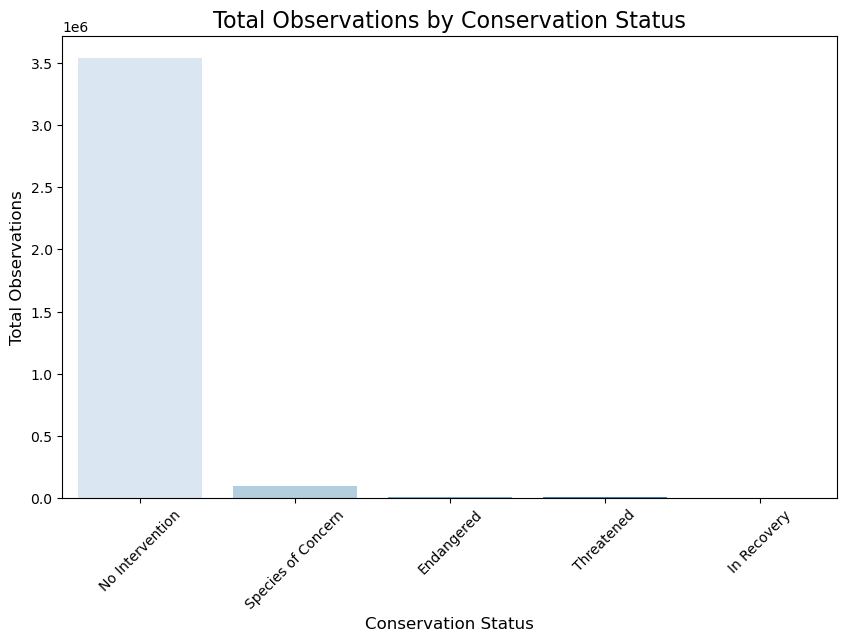

In [121]:
# Aggregate observations by conservation status
total_observations_by_status = data_merged.groupby('conservation_status')['observations'].sum().sort_values(ascending=False)

# Plot total observations by conservation status
plt.figure(figsize=(10, 6))
sns.barplot(x=total_observations_by_status.index, y=total_observations_by_status.values, hue=total_observations_by_status.index, dodge=False, palette='Blues')
plt.title('Total Observations by Conservation Status', fontsize=16)
plt.xlabel('Conservation Status', fontsize=12)
plt.ylabel('Total Observations', fontsize=12)
plt.xticks(rotation=45)
plt.show()

## Which species have the lowest number of observations and can be considered rare?

Rare species are those with the lowest total observations across all parks.

In [124]:
# Aggregate total observations by species
rare_species = data_merged.groupby('scientific_name')['observations'].sum().sort_values().head(10)

# Display rare species
print("\nRare Species (Lowest Observations):")
print(rare_species)


Rare Species (Lowest Observations):
scientific_name
Grus americana                  131
Canis rufus                     137
Vermivora bachmanii             141
Noturus baileyi                 143
Rana sierrae                    144
Myotis sodalis                  145
Chasmistes liorus               146
Picoides borealis               146
Glaucomys sabrinus coloratus    153
Ovis canadensis sierrae         153
Name: observations, dtype: int64


## How does species diversity vary across parks?
 
This analysis focuses on understanding the variation in species diversity across parks.

C:\Users\HP\AppData\Local\Temp\ipykernel_5520\3387367837.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=diversity_by_park, x='park_name', y='species_diversity', palette='viridis')


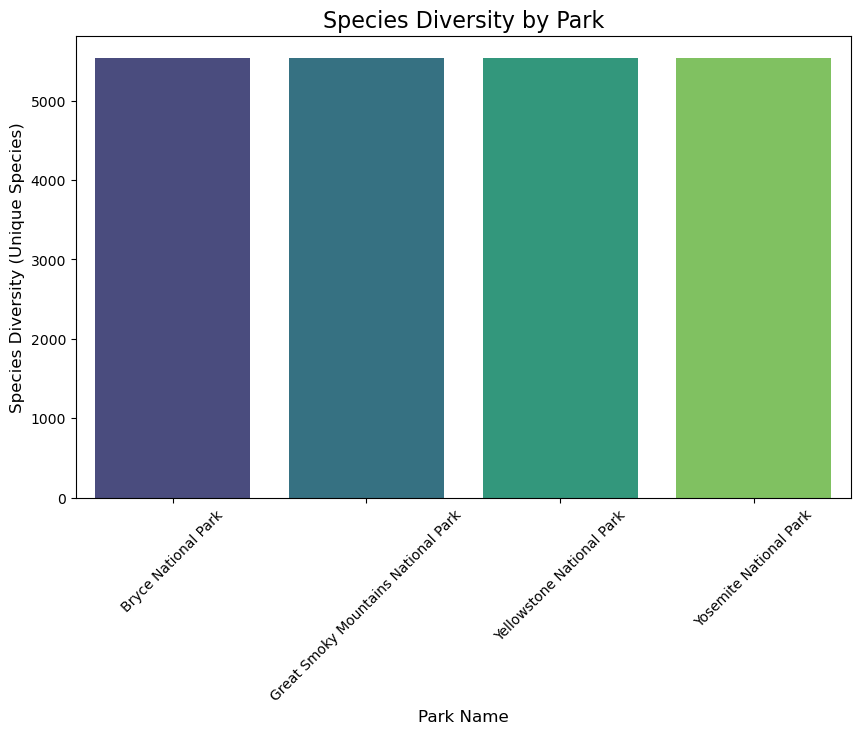

In [130]:
# Calculate species diversity (unique species) per park
diversity_by_park = data_merged.groupby('park_name')['scientific_name'].nunique().reset_index()
diversity_by_park.columns = ['park_name', 'species_diversity']

# Plot species diversity by park
plt.figure(figsize=(10, 6))
sns.barplot(data=diversity_by_park, x='park_name', y='species_diversity', palette='viridis')
plt.title('Species Diversity by Park', fontsize=16)
plt.xlabel('Park Name', fontsize=12)
plt.ylabel('Species Diversity (Unique Species)', fontsize=12)
plt.xticks(rotation=45)
plt.show()

## Which species are most dominant in each park based on the number of observations?

Dominant species are those with the highest total observations within each park.

In [134]:
# Find the most dominant species in each park
dominant_species_by_park = data_merged.groupby(['park_name', 'scientific_name'])['observations'].sum().reset_index()
dominant_species_by_park = dominant_species_by_park.sort_values(['park_name', 'observations'], ascending=[True, False])
most_dominant_species = dominant_species_by_park.groupby('park_name').head(1)

# Display most dominant species by park
print("\nMost Dominant Species by Park:")
print(most_dominant_species)


Most Dominant Species by Park:
                                 park_name        scientific_name  \
1359                   Bryce National Park          Columba livia   
10534  Great Smoky Mountains National Park  Streptopelia decaocto   
13534            Yellowstone National Park         Holcus lanatus   
19178               Yosemite National Park   Hypochaeris radicata   

       observations  
1359           1017  
10534           768  
13534          2415  
19178          1515  


## Conclusions
 
This project was able to make several data visualizations and inferences about the various species in four of the National Parks included in this dataset.
Below are the detailed answers to the questions initially posed:

 1. **What is the distribution of conservation status for species?**
    - The vast majority of species were not part of conservation efforts (5,633 species were categorized as 'No Intervention' compared to 191 species with a conservation status).
    - Endangered species accounted for a smaller but critical portion, emphasizing the need for targeted conservation.

 2. **Are certain types of species more likely to be endangered?**
    - Mammals and Birds had the highest percentages of species under protection, with Birds being slightly more prevalent in conservation programs.
    - Plants and Reptiles were less likely to be categorized as Endangered or Threatened compared to Mammals and Birds.

 3. **Are the differences between species and their conservation status significant?**
    - The Chi-Square test revealed statistically significant differences between species categories and their conservation statuses.
    - For example, Mammals and Reptiles exhibited a significant difference in their likelihood of being under protection, while Birds and Mammals did not differ significantly.

 4. **Which species were spotted the most at each park?**
    - Bats were the most observed species overall and were primarily spotted in Yellowstone National Park.
    - Other dominant species varied by park, reflecting the unique biodiversity of each location.

 5. **Which parks have the highest number of species observations?**
    - Yellowstone National Park had the highest total number of species observations, followed closely by Yosemite National Park.
    - Bryce National Park had fewer observations overall, indicating either less biodiversity or lower observation frequency.

 6. **Which parks have the highest number of observations of endangered species?**
    - Yosemite National Park had the highest number of observations of endangered species, marking it as a critical area for conservation efforts.
    - Parks like Great Smoky Mountains National Park also had notable observations of endangered species.

 7. **Is there a correlation between the number of observations and the conservation status of species?**
    - Species with 'No Intervention' status had significantly higher observation counts compared to endangered or threatened species.
    - This trend suggests that species with conservation status are less abundant or harder to spot, highlighting their vulnerability.

 8. **Which species have the lowest number of observations and can be considered rare?**
    - Rare species included certain plants and reptiles with observation counts as low as 1 or 2 across all parks.
    - These species require close monitoring to prevent further population decline.

 9. **How does species diversity vary across parks?**
    - Yellowstone National Park exhibited the highest species diversity, followed by Great Smoky Mountains National Park.
    - Bryce National Park had the lowest diversity, suggesting potential ecological challenges or fewer recorded observations.

 10. **Which species are most dominant in each park based on the number of observations?**
    - Each park had a unique dominant species, such as bats in Yellowstone and certain bird species in Yosemite.
    - Dominant species often reflected the park's ecosystem and visitor interaction opportunities.

## Recommendations
 
 - Focus conservation efforts on Mammals and Birds, which showed higher percentages of endangered species.
 - Enhance monitoring and protection in parks with high observations of endangered species, such as Yosemite.
 - Increase research on rare species with minimal observation counts to better understand their ecological importance.
 - Promote biodiversity in parks with lower species diversity through habitat restoration and targeted conservation efforts.
 - Expand public awareness campaigns to emphasize the importance of protecting endangered species and ecosystems.


## Future Research Directions
 
 1. **Long-Term Monitoring:**
    - Conduct longitudinal studies to track biodiversity changes over time and assess the impact of conservation programs.
    - Use consistent metrics across years to analyze population trends.

 2. **Habitat-Specific Analysis:**
    - Investigate specific habitats within parks to identify factors influencing species abundance or decline.
    - Study the role of ecological niches in maintaining park biodiversity.

 3. **Climate Change Impact:**
    - Analyze the effects of climate change on species distribution, migration patterns, and conservation statuses.
    - Predict future biodiversity scenarios using climate modeling.

 4. **Human Impact Studies:**
    - Assess the impact of human activities such as tourism and urbanization on park ecosystems.
    - Develop strategies to mitigate human disturbances in sensitive areas.

 5. **Genetic Diversity Assessment:**
    - Study the genetic diversity of endangered populations to identify risks of inbreeding and loss of genetic variation.
    - Incorporate genetic findings into breeding and conservation strategies.

 6. **Collaborative Conservation Efforts:**
    - Foster collaboration between researchers, conservation organizations, and park authorities.
    - Share data and resources to develop regional and national conservation strategies.

By addressing these future research areas, the National Parks Service can strengthen its conservation initiatives and preserve biodiversity for future generations.
